In [41]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
cropdf = pd.read_csv("Crop_recommendation.csv")

Random Forest Model accuracy score: 0.9939
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9939


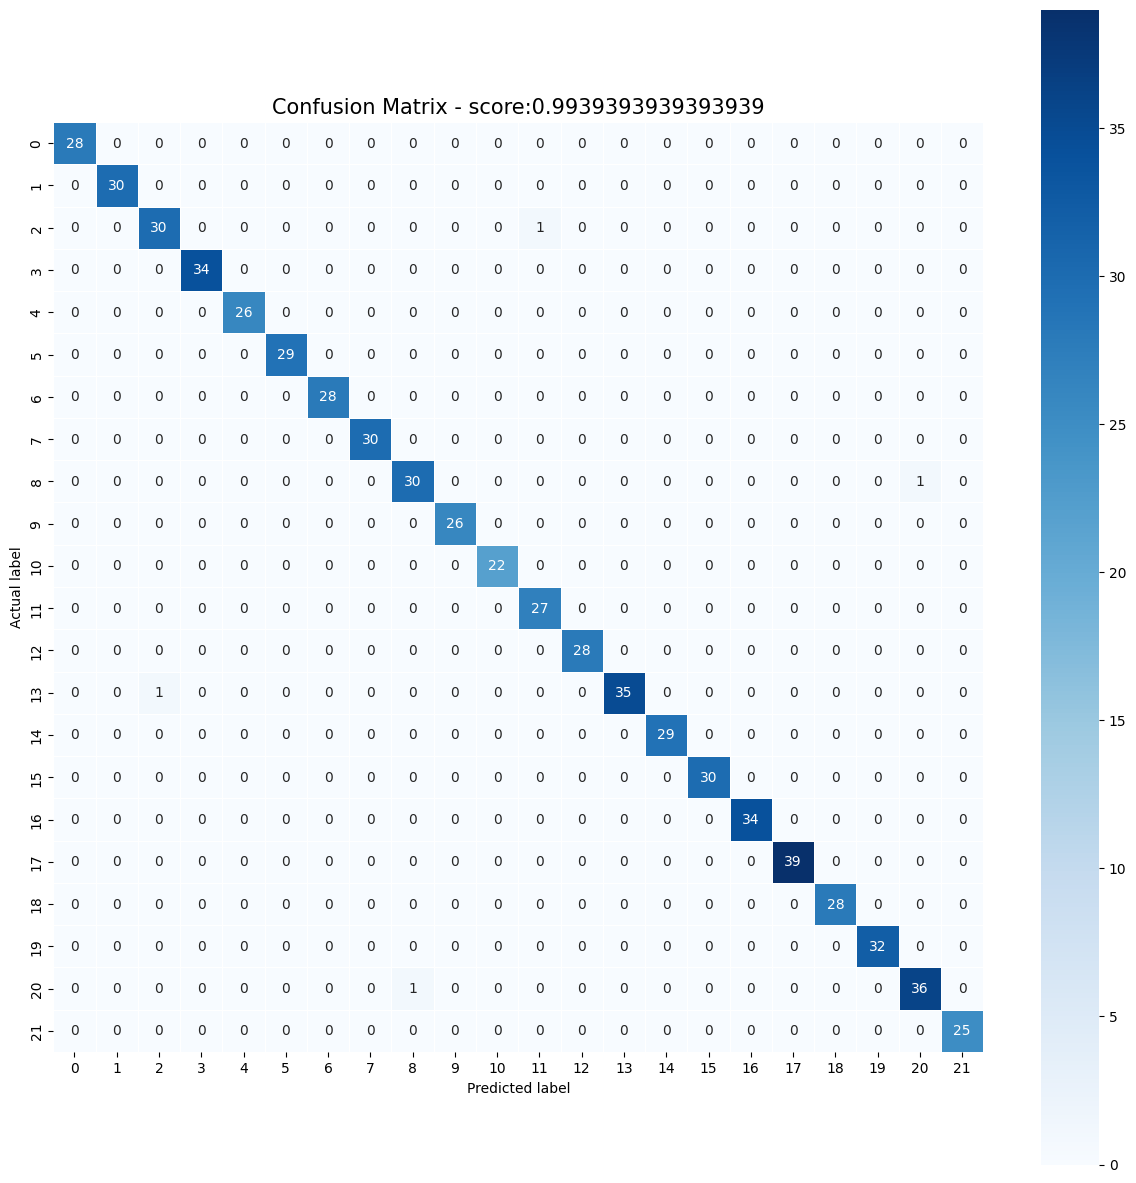

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [43]:
X = cropdf.drop('label', axis=1)
y = cropdf['label']

# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# Build and train the Random Forest model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# View Accuracy
accuracy = accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy))

# Compare train and test set accuracy
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

# Check for Overfitting
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

# Classification Metrics
print(classification_report(y_test, y_pred))

In [44]:
newdata = model.predict([[90, 42, 43, 20.879744, 75, 5.5, 220]])
print(newdata)

['rice']


/Users/akshatmanohar/anaconda3/envs/hackbmu/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [45]:
import pickle

with open('crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [46]:
#For requirements.txt
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.8.4
numpy==1.26.4
pandas==2.2.2
scikit-learn==1.4.2
